In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import cv2
import PIL
import os
import pathlib


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\sanjay\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\sanjay\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\sanjay\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\sanjay\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\sanjay\anaconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\sanjay\anaconda3\envs\py310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\sanjay\anaconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\sanjay\anaconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for gpu in gpu_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
datasets = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=datasets,  cache_dir=".",  untar=True)

In [ ]:
data_dir

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

In [ ]:
len(list(data_dir.glob("*/*.jpg")))

In [2]:
rose = list(data_dir.glob("roses/*"))
daisy = list(data_dir.glob("daisy/*"))
dandelion = list(data_dir.glob("dandelion/*"))
sunflower = list(data_dir.glob("sunflowers/*"))
tulip = list(data_dir.glob("tulips/*"))


NameError: name 'data_dir' is not defined

In [3]:
len(rose)

NameError: name 'rose' is not defined

In [4]:
rose[10]

NameError: name 'rose' is not defined

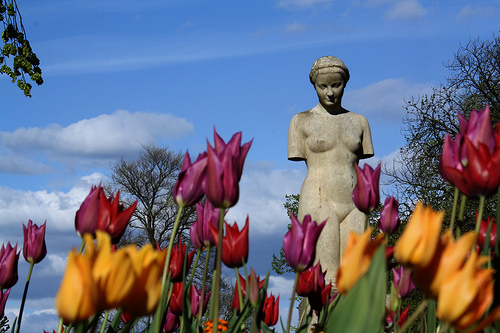

In [11]:
PIL.Image.open(str(tulip[100]))

In [12]:
str(tulip[100])

'datasets\\flower_photos\\tulips\\13903937027_44b9f2f5b8.jpg'

In [13]:
img = cv2.imread(str(tulip[100]))
img.shape

(333, 500, 3)

In [14]:
cv2.resize(img,(180,180))

array([[[  4,   2,   1],
        [165, 103,  55],
        [207, 125,  65],
        ...,
        [199, 130,  88],
        [194, 131,  92],
        [196, 132,  91]],

       [[  3,   5,   2],
        [200, 126,  63],
        [162,  92,  51],
        ...,
        [199, 132,  88],
        [198, 130,  87],
        [199, 131,  84]],

       [[ 10,  33,  35],
        [185, 116,  61],
        [127,  72,  46],
        ...,
        [200, 131,  84],
        [202, 127,  79],
        [200, 128,  81]],

       ...,

       [[186, 155, 134],
        [154, 119, 109],
        [ 24,  28,  27],
        ...,
        [ 21,  44,  32],
        [ 11,  30,  21],
        [  7,  37,  22]],

       [[ 42,  54,  47],
        [ 28,  27,  28],
        [ 76,  65,  53],
        ...,
        [ 28,  62,  47],
        [ 17,  46,  32],
        [  6,  35,  21]],

       [[ 45,  49,  36],
        [ 62,  52,  41],
        [175, 140, 111],
        ...,
        [ 32,  68,  51],
        [ 24,  57,  42],
        [  7,  34,  21]]

In [48]:
image_dataset = {
    "rose" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "sunflower":list(data_dir.glob("sunflowers/*")),
    "tulip":list(data_dir.glob("tulips/*"))
}

image_label = {
    "rose" : 0,
    "daisy" : 1,
    "dandelion":2,
    "sunflower":3,
    "tulip":4
}

X=[]
y=[]
for flower_name, images in image_dataset.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is None:
            print(f"Failed to load image: {image}")
            continue
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(image_label[flower_name])
        
        
    

Failed to load image: datasets\flower_photos\daisy\.ipynb_checkpoints


In [49]:
X = np.array(X)
y = np.array(y)
X = X/255
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(2936, 180, 180, 3)

In [50]:
X_train[1]

array([[[0.98431373, 0.76078431, 0.60784314],
        [0.99215686, 0.76078431, 0.60784314],
        [0.99215686, 0.76078431, 0.60784314],
        ...,
        [0.99215686, 0.78431373, 0.63921569],
        [0.99215686, 0.79215686, 0.64705882],
        [1.        , 0.8       , 0.65882353]],

       [[0.97647059, 0.75686275, 0.59215686],
        [0.98431373, 0.75294118, 0.59607843],
        [0.98823529, 0.75686275, 0.59607843],
        ...,
        [0.99215686, 0.78431373, 0.63921569],
        [0.98823529, 0.78431373, 0.63921569],
        [0.99215686, 0.78823529, 0.64313725]],

       [[0.98431373, 0.76078431, 0.58039216],
        [0.98431373, 0.75686275, 0.58823529],
        [0.98823529, 0.75686275, 0.58823529],
        ...,
        [0.98823529, 0.78039216, 0.63529412],
        [0.98431373, 0.78039216, 0.63529412],
        [0.99215686, 0.78823529, 0.63921569]],

       ...,

       [[0.98039216, 0.9372549 , 0.90980392],
        [0.97254902, 0.86666667, 0.79215686],
        [0.99607843, 0

In [51]:
model = Sequential([
    layers.Conv2D(16, 3,  padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(), 

    layers.Conv2D(32, 3,  padding='same', activation='relu'),
    layers.MaxPooling2D(), 

    layers.Conv2D(64, 3,  padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

model.compile(optimizer="adam",
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [52]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 11s 99ms/step - loss: 1.3987 - accuracy: 0.4128
Epoch 2/10
92/92 [==============================] - 8s 89ms/step - loss: 1.0181 - accuracy: 0.6039
Epoch 3/10
92/92 [==============================] - 4s 43ms/step - loss: 0.8239 - accuracy: 0.6914
Epoch 4/10
92/92 [==============================] - 11s 125ms/step - loss: 0.6218 - accuracy: 0.7554
Epoch 5/10
92/92 [==============================] - 4s 44ms/step - loss: 0.4236 - accuracy: 0.8566
Epoch 6/10
92/92 [==============================] - 4s 44ms/step - loss: 0.2398 - accuracy: 0.9230
Epoch 7/10
92/92 [==============================] - 4s 44ms/step - loss: 0.1819 - accuracy: 0.9441
Epoch 8/10
92/92 [==============================] - 4s 44ms/step - loss: 0.0860 - accuracy: 0.9755
Epoch 9/10
92/92 [==============================] - 4s 45ms/step - loss: 0.0612 - accuracy: 0.9860
Epoch 10/10
92/92 [==============================] - 4s 45ms/step - loss: 0.0764 - accuracy: 0.9806


In [20]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [21]:
tf.test.is_built_with_cuda()  # Should return True
tf.test.is_gpu_available()  


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [22]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [23]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for gpu in gpu_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

In [25]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 1s 33ms/step - loss: 1.8875 - accuracy: 0.6349


[1.8874664306640625, 0.6348773837089539]

In [26]:
data_augmentation = Sequential([ 
layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.1),
layers.experimental.preprocessing.RandomContrast(0.1)

                                                              
])

In [27]:
model = Sequential([
    data_augmentation, 
    layers.Conv2D(16, 3,  padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(), 

    layers.Conv2D(32, 3,  padding='same', activation='relu'),
    layers.MaxPooling2D(), 

    layers.Conv2D(64, 3,  padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

model.compile(optimizer="adam",
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
367/367 [==============================] - 24s 55ms/step - loss: 1.2137 - accuracy: 0.4833
Epoch 2/10
367/367 [==============================] - 21s 57ms/step - loss: 0.9457 - accuracy: 0.6196
Epoch 3/10
367/367 [==============================] - 22s 59ms/step - loss: 0.8324 - accuracy: 0.6757
Epoch 4/10
367/367 [==============================] - 23s 62ms/step - loss: 0.7862 - accuracy: 0.6901
Epoch 5/10
367/367 [==============================] - 23s 63ms/step - loss: 0.7216 - accuracy: 0.7282
Epoch 6/10
367/367 [==============================] - 22s 59ms/step - loss: 0.6851 - accuracy: 0.7394
Epoch 7/10
367/367 [==============================] - 22s 60ms/step - loss: 0.6423 - accuracy: 0.7493
Epoch 8/10
367/367 [==============================] - 22s 60ms/step - loss: 0.6098 - accuracy: 0.7708
Epoch 9/10
367/367 [==============================] - 22s 59ms/step - loss: 0.5511 - accuracy: 0.7854
Epoch 10/10
367/367 [==============================] - 21s 56ms/step - loss: 0.518

In [31]:
model.evaluate(X_test, y_test, batch_size=8)

92/92 [==============================] - 1s 7ms/step - loss: 0.8381 - accuracy: 0.6866


[0.8380556702613831, 0.6866484880447388]

In [43]:
tf.keras.backend.clear_session()
import tensorflow_hub as hub

In [44]:
image_dataset = {
    "rose" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "sunflower":list(data_dir.glob("sunflowers/*")),
    "tulip":list(data_dir.glob("tulips/*"))
}

image_label = {
    "rose" : 0,
    "daisy" : 1,
    "dandelion":2,
    "sunflower":3,
    "tulip":4
}

X=[]
y=[]
for flower_name, images in image_dataset.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is None:
            print(f"Failed to load image: {image}")
            continue
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(image_label[flower_name])
        
        
    

Failed to load image: datasets\flower_photos\daisy\.ipynb_checkpoints


In [45]:
X = np.array(X)
y = np.array(y)
X = X/255
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(2936, 224, 224, 3)

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=5)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [53]:
print(hub.__version__)

0.12.0
